# Question 1

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df_ins = pd.read_csv("Insurance_Dataset.csv")
df_ins

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

There are many statistics that could be discussed for the dataset, below are some examples:

In [3]:
# Summary and data types
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Statistics about the features and the targets
df_ins.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

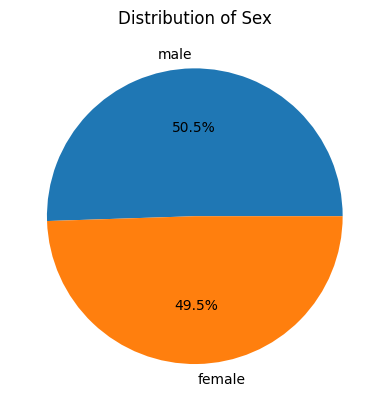

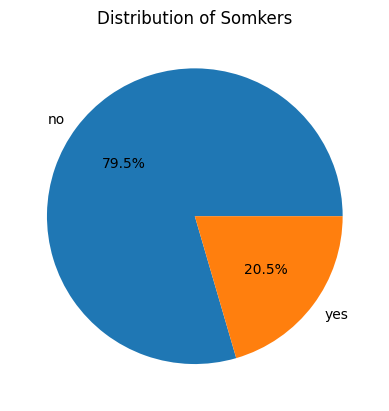

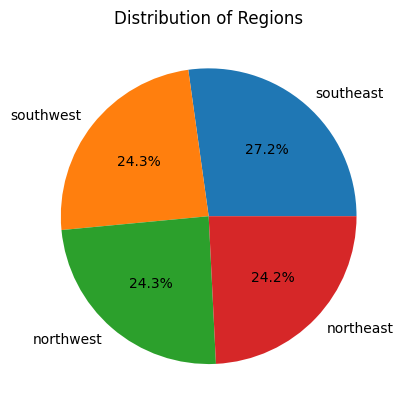

In [5]:
# Attributes Distributions
sex_count = df_ins['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.show()

smoker_count = df_ins['smoker'].value_counts()
plt.title('Distribution of Somkers')
plt.pie(smoker_count, labels=smoker_count.index, autopct='%1.1f%%')
plt.show()

region_count = df_ins['region'].value_counts()
plt.title('Distribution of Regions')
plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%')
plt.show()

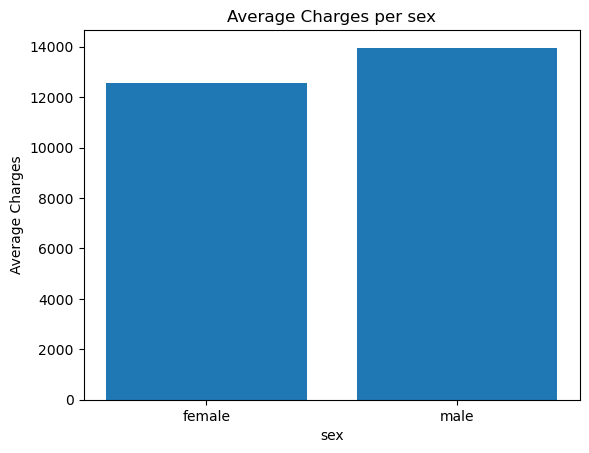

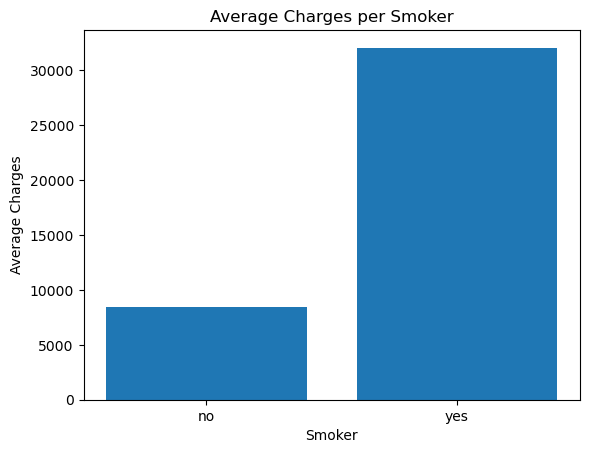

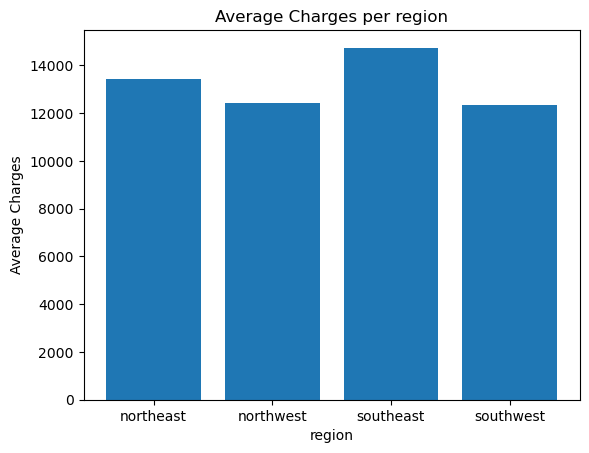

In [6]:
# Average Charges per attribute
Charges_sex = df_ins.groupby('sex')['charges'].mean()
Charges_smoker = df_ins.groupby('smoker')['charges'].mean()
Charges_region = df_ins.groupby('region')['charges'].mean()

plt.bar(Charges_sex.index, Charges_sex.values)
plt.xlabel('sex')
plt.ylabel('Average Charges')
plt.title("Average Charges per sex")
plt.show()

plt.bar(Charges_smoker.index, Charges_smoker.values)
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.title("Average Charges per Smoker")
plt.show()


plt.bar(Charges_region.index, Charges_region.values)
plt.xlabel('region')
plt.ylabel('Average Charges')
plt.title("Average Charges per region")
plt.show()

In [6]:
# Encoding data
label_encoder = LabelEncoder()
df_ins['smoker'] = label_encoder.fit_transform(df_ins['smoker'])
df_ins['sex'] = label_encoder.fit_transform(df_ins['sex'])
df_ins['region'] = label_encoder.fit_transform(df_ins['region'])

In [7]:
df_ins

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [8]:
# Training
X = df_ins.iloc[:, :-1]  # all columns except the last
y = df_ins.iloc[:, -1]  # only the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [9]:
lr_predictions = lr_model.predict(X_test)
lr_predictions_tr = lr_model.predict(X_train)

lr_mse_tr = mean_squared_error(y_train, lr_predictions_tr)
lr_mae_tr = mean_absolute_error(y_train, lr_predictions_tr)

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

print("Training  mean squared error: ", lr_mse_tr)
print("Training absolute squared error: ", lr_mae_tr)

print("Testing  mean squared error: ", lr_mse)
print("Testing absolute squared error: ", lr_mae)

Training  mean squared error:  37969842.62686115
Training absolute squared error:  4250.321373663908
Testing  mean squared error:  33311355.281859964
Testing absolute squared error:  4013.6929857811974


While your MSE seems too large, it is reasonable given the targets in the dataset (the targets are in 10s of thousands). 37M in MSE means that on average, the error is in the range of 6k. This is not ideal, but it is reasonable. The performance is improved with data preprocessing and normalization. The plot below shows how the predictions vary from the actual targets.

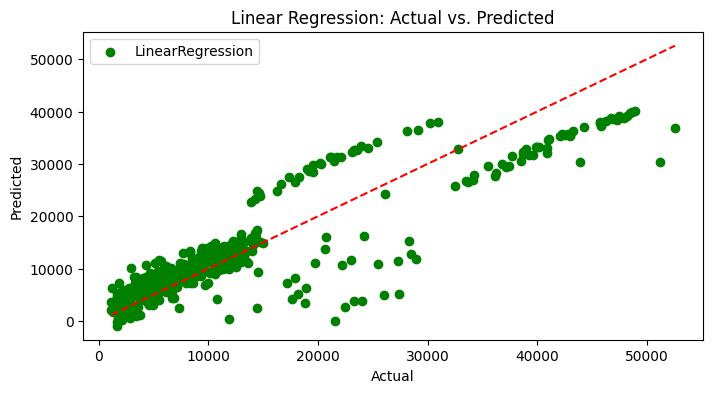

In [10]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, lr_predictions, color='green', label='LinearRegression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Question 2

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [23]:
df_can = pd.read_csv("Cancer_Dataset.csv")
df_can

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
304         YES  
305         YES  
306         YES  
307         YES  
308         YES  

[309 rows x 16 columns]

In [24]:
# Summary and data types
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [25]:
# Statistics about the features and the targets
df_can.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.497588   
min           1.000000    1.000000    1.000000    1.000000           1.000000   
25%           1.000000    1.000000    1.000000    1.000000           1.000000   
50%           2.000000    2.000000    2.000000    2.000000           2.000000   
75%           2.000000    2.000000    2.000000    2.000000           2.000000   
max           2.000000    2.000000    2.000000    2.000000           2.000000   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
count  309.000000           309.000000             309.000000  309.000000  
mean     1.579288             1.640777               1.469256    1.556634  
std      0.494474             0.480551               0.499863    0.497588  
min      1.000000             1.000000               1.000000    1.000000  
25%      1.000000             1.000000               1.000000    1.000000  
50%      2.000000             2.000000               1.000000    2.000000  
75%      2.000000             2.000000               2.000000    2.000000  
max      2.000000             2.000000               2.000000    2.000000

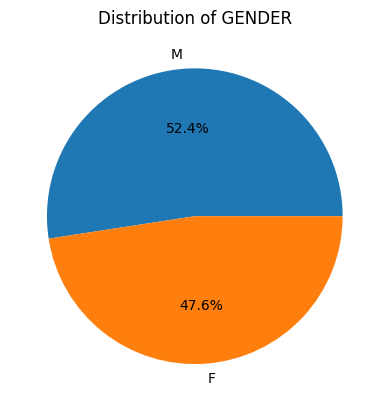

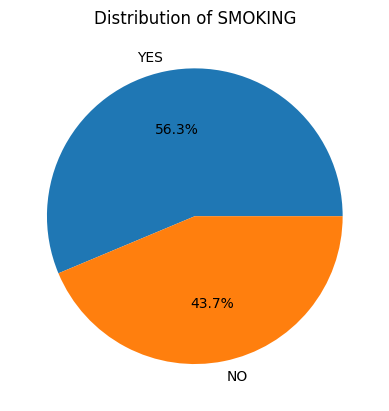

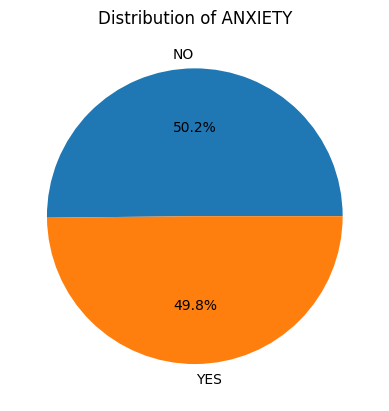

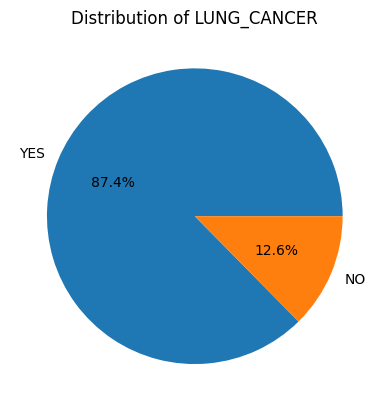

In [26]:
# Attributes Distributions
gender_count = df_can['GENDER'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Distribution of GENDER')
plt.show()

smoking_labels = df_can['SMOKING'].replace({1: 'NO', 2: 'YES'})
smoker_count = smoking_labels.value_counts()
plt.title('Distribution of SMOKING')
plt.pie(smoker_count, labels=smoker_count.index, autopct='%1.1f%%')
plt.show()

anxiety_labels = df_can['ANXIETY'].replace({1: 'NO', 2: 'YES'})
anxiety_count = anxiety_labels.value_counts()
plt.title('Distribution of ANXIETY')
plt.pie(anxiety_count, labels=anxiety_count.index, autopct='%1.1f%%')
plt.show()

cancer_count = df_can['LUNG_CANCER'].value_counts()
plt.pie(cancer_count, labels=cancer_count.index, autopct='%1.1f%%')
plt.title('Distribution of LUNG_CANCER')
plt.show()

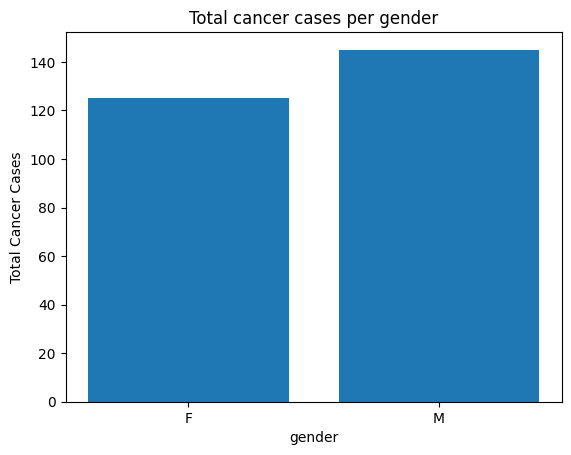

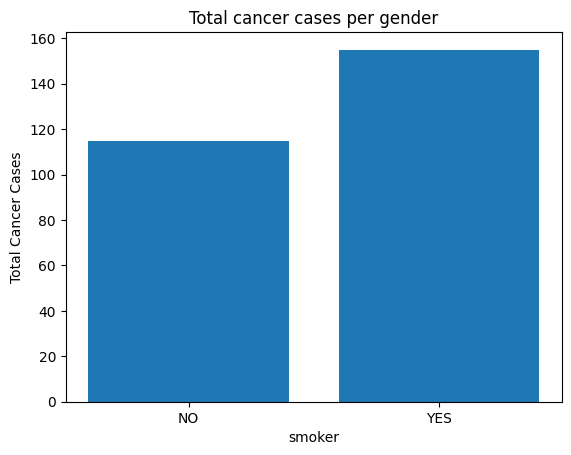

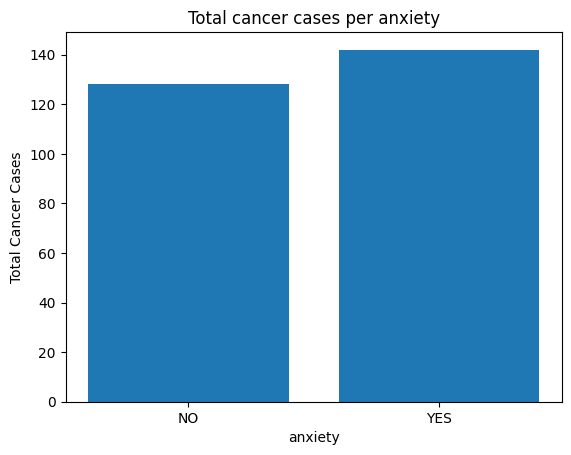

In [27]:
# Cancer cases per attribute
df_can_t = df_can.copy()
df_can_t['LUNG_CANCER'] = df_can_t['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df_can_t['SMOKING'] = df_can_t['SMOKING'].map({1: 'NO', 2:'YES'})
df_can_t['ANXIETY'] = df_can_t['ANXIETY'].map({1: 'NO', 2:'YES'})

Cancer_gender = df_can_t.groupby('GENDER')['LUNG_CANCER'].sum()
Cancer_smoking = df_can_t.groupby('SMOKING')['LUNG_CANCER'].sum()
Cancer_anxiety = df_can_t.groupby('ANXIETY')['LUNG_CANCER'].sum()

plt.bar(Cancer_gender.index, Cancer_gender.values)
plt.xlabel('gender')
plt.ylabel('Total Cancer Cases')
plt.title("Total cancer cases per gender")
plt.show()

plt.bar(Cancer_smoking.index, Cancer_smoking.values)
plt.xlabel('smoker')
plt.ylabel('Total Cancer Cases')
plt.title("Total cancer cases per gender")
plt.show()


plt.bar(Cancer_anxiety.index, Cancer_anxiety.values)
plt.xlabel('anxiety')
plt.ylabel('Total Cancer Cases')
plt.title("Total cancer cases per anxiety")
plt.show()

In [33]:
# Encoding data
label_encoder = LabelEncoder()
df_can['GENDER'] = label_encoder.fit_transform(df_can['GENDER'])
df_can['LUNG_CANCER'] = label_encoder.fit_transform(df_can['LUNG_CANCER'])

In [34]:
# Training
X1 = df_can.iloc[:, :-1]  # all columns except the last
y1 = df_can.iloc[:, -1]  # only the last column
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state=0)
lr_model = LogisticRegression(max_iter=1000)

### Search Space

In [35]:
hyperparameters = {'C':[0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}
hyperparameters

{'C': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}

In [36]:
clf_lr_model = GridSearchCV(lr_model, hyperparameters)
clf_lr_model.fit(X_train1, y_train1)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]})

In [37]:
clf_lr_model.best_params_

{'C': 50.0}

In [38]:
lr_predictions_tr = clf_lr_model.predict(X_train1)
lr_predictions = clf_lr_model.predict(X_test1)
target_names = ['NO', 'YES']
print("Training Results: \n", classification_report(y_train1, lr_predictions_tr, target_names = target_names))
print("Testing Results : \n", classification_report(y_test1, lr_predictions, target_names = target_names))

Training Results: 
               precision    recall  f1-score   support

          NO       0.77      0.71      0.74        24
         YES       0.96      0.97      0.97       192

    accuracy                           0.94       216
   macro avg       0.87      0.84      0.85       216
weighted avg       0.94      0.94      0.94       216

Testing Results : 
               precision    recall  f1-score   support

          NO       0.67      0.40      0.50        15
         YES       0.89      0.96      0.93        78

    accuracy                           0.87        93
   macro avg       0.78      0.68      0.71        93
weighted avg       0.86      0.87      0.86        93

